Import necessary libraries and codes

In [1]:

import pandas as pd
from Model import *
from Process import process_main
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]


Load mouse olfactory bulb (MOB) data and process

In [2]:
# Load the csv files
st = pd.read_csv('data_mob\\raw\\Rep12_MOB_count_matrix.csv', sep=',', header=0) # Spatial Transcriptomics
st_loc = pd.read_csv('data_mob\\raw\\Rep12_MOB_location.csv', sep=',', header=0) # Spot locations
sc = pd.read_csv('data_mob\\raw\\OB_6_runs_processed_seurat.dge_filtered.csv', sep=',', header=0) # scRNA-seq dara
sc_meta = pd.read_csv('data_mob\\raw\\GSE121891_Figure_2_metadata_filtered.csv', sep=',', header=0) # Meta data

# Process the data
st_processed, sc_processed, sc_ave, st_loc_sorted, sc_meta_sorted = process_main(st, st_loc, sc, sc_meta, vmr_threshold=0.9, log2fold=1.25)

# reset indices
st_processed.reset_index(drop=True, inplace=True)
sc_ave.reset_index(drop=True, inplace=True)
st_loc_sorted.reset_index(drop=True, inplace=True)

# Save the processed files
# sc_processed and sc_meta_sorted are not used
st_processed.to_csv('data_mob\\st_processed.csv', sep=',', index=False)
sc_ave.to_csv('data_mob\\sc_ave.csv', sep=',', index=False)
st_loc_sorted.to_csv('data_mob\\st_loc_sorted.csv', sep=',', index=False)


# of genes in st and sc:  16034 18560


Now filtering out zero count genes
# of genes in st and sc:  16034 17812


Now sorting the data and selecting genes expressed in both sc and st
Repeated genes in st: []
Repeated genes in sc: []
# of genes in st and sc:  14289 14289


Now selecting genes and calculating cell type mean expression
{'EPL-IN': np.int64(161), 'GC': np.int64(8614), 'M/TC': np.int64(1133), 'OSs': np.int64(1200), 'PGC': np.int64(1693)}
# of genes in st and sc:  4284 4284


Run the model

In [6]:
mean, std = run_basin(st_selected=st_processed,     # processed spatial transcriptomics
                      st_loc=st_loc_sorted,     # locations of spots in spatial transcriptomics
                      sc_ave=sc_ave,    # processed scRNA-seq 
                      img_path='data_mob\\raw\\HE_Rep12_MOB.jpg',   # optional: H&E image of ST data
                      sigma=1.0,      # std of the Gaussian kernel in graph Laplacian
                      burn=5,   # number of burn-in steps
                      thin=10,   # number of sampling
                      tmn=True,    # If true: sampling as truncated 
                      save = 'results')

mean.to_csv('results\\out_mean.csv', sep=',', index=False)
std.to_csv('results\\out_std.csv', sep=',', index=False)

print('\n')
print(mean)

d:\program\Miniconda\envs\myenvs312\Lib\site-packages\PIL\Image.py:3402: DecompressionBombWarning: Image size (92001306 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Time of sampling one v = 4.192449799971655 Average time = 0.6987416333286092
Sample #: 0 min= 3.147271434889889e-06 max= 0.9821647777947627
Time of sampling one v = 4.103418200043961 Average time = 0.6839030333406603
Sample #: 1 min= 2.880018358516245e-13 max= 0.9999999733021508
Time of sampling one v = 4.1132214000681415 Average time = 0.6855369000113569
Sample #: 2 min= 4.203616651064174e-07 max= 0.9843736869152688
Time of sampling one v = 4.080947799957357 Average time = 0.6801579666595595
Sample #: 3 min= 9.078481237681324e-13 max= 0.9999998235480961
Time of sampling one v = 3.6903228000737727 Average time = 0.6150538000122955
Sample #: 4 min= 3.5847889483461484e-12 max= 0.9999999190039606
Time of sampling one v = 3.6771468999795616 Average time = 0.6128578166632602
Sample #: 5 min= -6.420341416701815e-15 max= 0.9999999829889006
Time of sampling one v = 3.827866100007668 Average time = 0.6379776833346114
Sample #: 6 min= 7.442178434521318e-13 max= 0.9999999876805996
Time of samplin

Visualize the outputs

['EPL-IN', 'GC', 'M/TC', 'OSs', 'PGC']


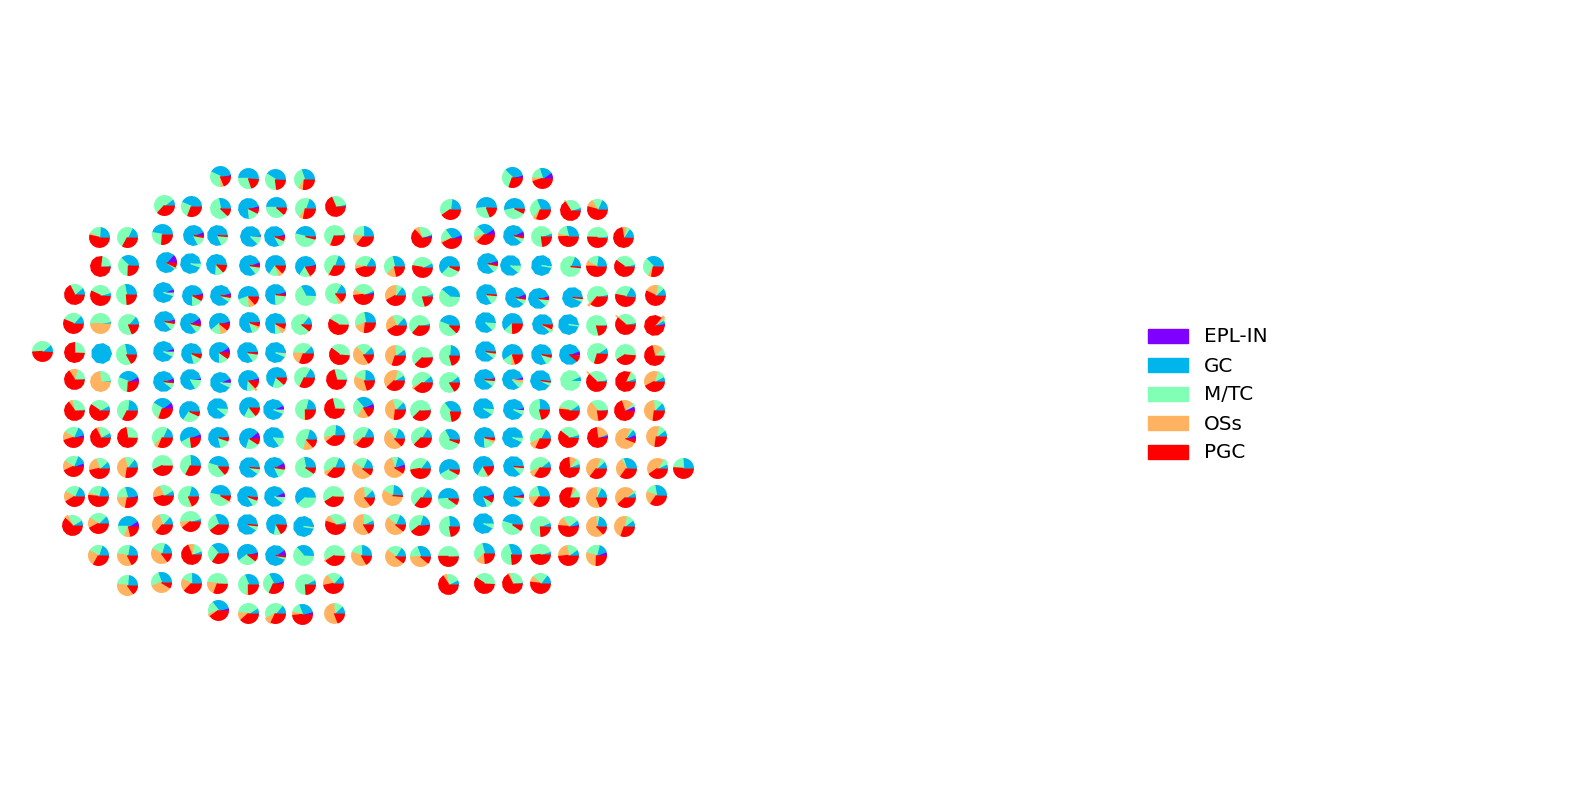

In [7]:
from Plot import *

plot_all(mean, st_loc_sorted, s=200)

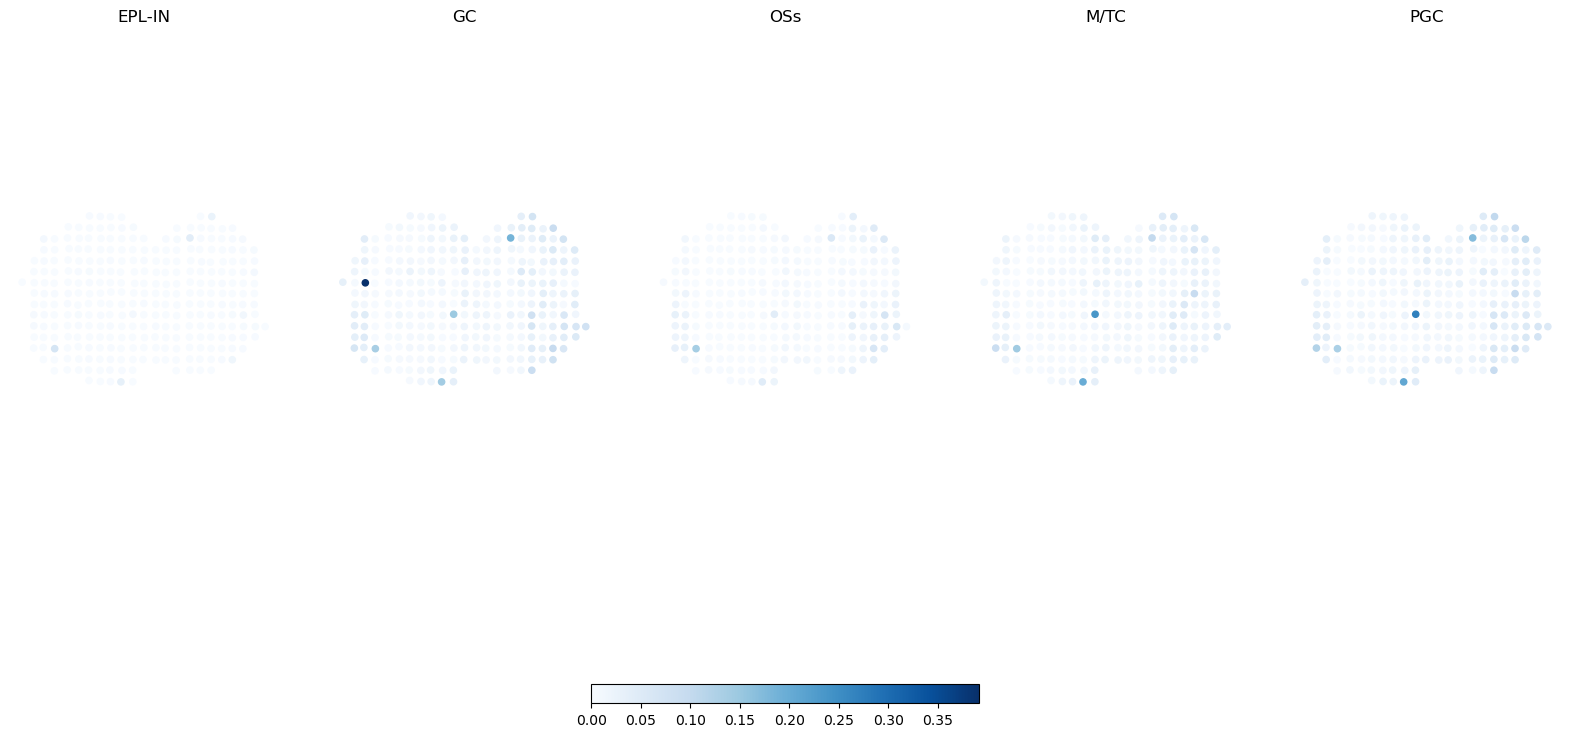

In [8]:
plot_std(std, st_loc_sorted, s=20)